# **<font size=4 color=#BB3D00 face=微软雅黑>移动平均过程的自相关</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/autocorrelation-of-moving-average-process.html     
描述：本案例由1个示例构成
### - <font color=DarkOrChid size=3>示例：如何通过过滤将自相关引入白噪声</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：如何通过过滤将自相关引入白噪声</font>

当我们在随机信号中引入自相关时，我们操纵其频率内容。移动平均滤波器衰减信号的高频分量，有效地使其平滑。
创建三点移动平均滤波器的脉冲响应。使用滤波器过滤N(0,1)个白噪声序列。将随机数生成器设置为可再现结果的默认设置。

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

定义函数detrend

    返回x：不删除趋势.

    参数
    ----------
    x : 任何对象

    axis : 整数
        忽略此参数

    另请参见
    --------
    detrend_mean : 另一种detrend算法
    detrend_linear : 另一种detrend算法
    detrend : 所有detrend算法的包装。
    

In [3]:
def detrend_none(x, axis=None):
   
    return x

定义函数M_xcorr
 
    绘制x和y之间的互相关


    参数
    ----------
    x, y : 长度为n的类数组

    maxlags : 整数, 默认: 10
        要显示的滞后数。如果没有，将返回 2 * len(x) - 1
        滞后

    Returns
    -------
    lags : 阵列（长度 2*maxlags+1)
        滞后向量.
    c : 阵列(长度 2*maxlags+1)
        自相关向量
    

In [4]:
def M_xcorr( x, y, normed=True, detrend=detrend_none,
           maxlags=20, **kwargs):
   
    Nx = len(x)
    if Nx != len(y):
        raise ValueError('x and y must be equal length')

    x = detrend(np.asarray(x))
    y = detrend(np.asarray(y))

    correls = np.correlate(x, y, mode="full")

    if normed:
        correls /= np.sqrt(np.dot(x, x) * np.dot(y, y))

    if maxlags is None:
        maxlags = Nx - 1

    if maxlags >= Nx or maxlags < 1:
        raise ValueError('maxlags must be None or strictly '
                         'positive < %d' % Nx)

    lags = np.arange(-maxlags, maxlags + 1)
    correls = correls[Nx - 1 - maxlags:Nx + maxlags]


    return  correls, lags

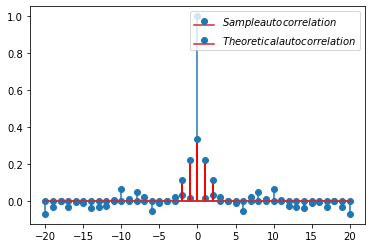

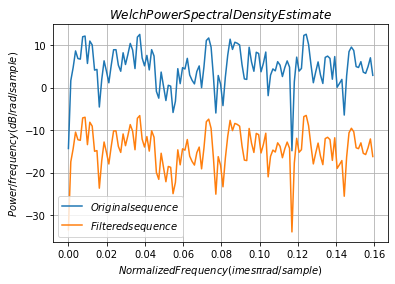

In [6]:
h = 1/3*np.array([1,1,1])
x = np.random.randn(1000,1)

y = signal.lfilter(h,1,x)
x = np.array(x).flatten()

y = np.array(y).flatten()
[xc,lags] = M_xcorr(y, y ,20)

Xc = np.zeros(np.size(xc))

Xc[18:23] = np.array([1, 2, 3, 2, 1])/9*np.var(x)
figure = plt.figure(111)
plt.stem(lags,xc,label = '$Sample autocorrelation$')

markerline, stemlines, baseline = plt.stem(lags,Xc,linefmt = 'r-',label = '$Theoretical autocorrelation$')
plt.setp(stemlines, 'linewidth', 2)
plt.legend(loc = "upper right")

figure = plt.figure(211)
wx, pxx= signal.welch(x)
wy, pyy = signal.welch(y)
plt.plot(wx/np.pi,20*np.log10(pxx),label = '$Original sequence$')
plt.plot(wy/np.pi,20*np.log10(pyy),label = '$Filtered sequence$')
plt.legend(loc = "lower left")

plt.xlabel('$Normalized Frequency (\times\pi rad/sample)$')
plt.ylabel('$Power/frequency (dB/rad/sample)$')
plt.title('$Welch Power Spectral Density Estimate$')
plt.grid(True)

plt.show()